University of Michigan - ROB 101 Computational Linear Algebra

# Lab 2: Vectors, Matrices and Systems of Linear Equations

### Welcome to the world of Julia!

### Vectors and Matrices

Vectors and matrices are extensively used in this course. In Julia, vectors are a specific kind of matrix. For instance, a column vector is a matrix that only has one collumn. Let's first learn how to create a vector in Julia.

### Example 1. (Review on your own) Create Vectors and Matrices

In [1]:
# Create a row vector of all odd numbers from 0 to 9 
row_vec = [1 3 5 7 9]
# Note: the numbers in a row vector should be included in '[]' and seperated by spaces

1×5 Array{Int64,2}:
 1  3  5  7  9

In [2]:
# Create a column vector of all even numbers from 0 to 9
col_vec = [0; 2; 4; 6; 8]
# Note: the numbers in a column vector should be seperated by ';'

5-element Array{Int64,1}:
 0
 2
 4
 6
 8

We created row and column vectors of integers. Let's create vector of real numbers.

In [3]:
# Create a column vector which has 1.2, 2.4, and 4.8
real_vec = [1.2; 2.4; 4.8]
# Note: Float64 is a primitive data type in Julia for real numbers (floating-point values).
# Int64 shown in previous cells is the type for integers. You don't need to worry about other types for now.

3-element Array{Float64,1}:
 1.2
 2.4
 4.8

We learned the syntax for creating vectors. Creating a matrix is as easy as creating multiple row vectors and using `;` to seperate each row. Make sure the number of entries in each row is the same, otherwise you will get an error.

In [4]:
# Create a 2-by-5 matrix where the 1st row are odd numbers and the 2nd row are even numbers from 0 to 9
A = [1 3 5 7 9; 0 2 4 6 8]

2×5 Array{Int64,2}:
 1  3  5  7  9
 0  2  4  6  8

### Practice 1.

In [15]:
# Create a column vector (called almost_zero_vec) of 5 entries: the 3rd entry is -1.5, and others are zeros
almost_zero_vec = [0; 0; -1.5; 0; 0;]
# your code here
# throw(ErrorException())

5-element Array{Float64,1}:
  0.0
  0.0
 -1.5
  0.0
  0.0

In [17]:
# Autograder cell
using LinearAlgebra
test1 = norm(almost_zero_vec)
test2 = sum(abs.(almost_zero_vec[1:2]))
test3 = size(almost_zero_vec)[1]
println("all nothings means likely correct")
TF1 = @assert test1 == 1.5
TF2 = @assert test2 == 0.0
TF3 = @assert test3 == 5
[TF1 TF2 TF3]

all nothings means likely correct


1×3 Array{Nothing,2}:
 nothing  nothing  nothing

In [ ]:
# Autograder cell

In [21]:
# Create a 3-by-4 matrix called zero_matrix with all zeros
zero_matrix = [
    0 0 0 0;
    0 0 0 0; 
    0 0 0 0; 
]
# your code here
# throw(ErrorException())

3×4 Array{Int64,2}:
 0  0  0  0
 0  0  0  0
 0  0  0  0

In [22]:
# Autograder cell
using LinearAlgebra
test1 = sum(zero_matrix)
test2 = size(zero_matrix)[1]
test3 = size(zero_matrix)[2]
println("all nothings means likely correct")
TF1 = @assert test1 == 0
TF2 = @assert test2 == 3
TF3 = @assert test3 == 4
[TF1 TF2 TF3]

all nothings means likely correct


1×3 Array{Nothing,2}:
 nothing  nothing  nothing

In [ ]:
# Autograder cell

There are other convenient ways to create a vector/matrix with all zeros or the same numbers by using built-in functions (We will discuss more about functions in Lab4).

In [26]:
# Create a 3-by-4 matrix called two_matrix with all twos
two_matrix = ones(3, 4) .+ 1
# Note: ones() is a function returning a vector/matrix with all one, 3 and 4 specify the size, specifically, 
# 3 is the number of rows and 4 is the number of columns

3×4 Array{Float64,2}:
 2.0  2.0  2.0  2.0
 2.0  2.0  2.0  2.0
 2.0  2.0  2.0  2.0

We can also create a random vector/matrix by using functions in the Random pacakge.

In [32]:
# Create a 3-by-4 matrix called rand_matrix with random numbers
using Random # Using an external pacakge called Random which provides functions
Random.seed!(1234) # Set the seed so that each of you get the same results. 
rand_matrix = rand(3, 4)

3×4 Array{Float64,2}:
 0.590845  0.460085  0.200586  0.579672
 0.766797  0.794026  0.298614  0.648882
 0.566237  0.854147  0.246837  0.0109059

### Example 2. (We will start here) Vector and Matrix Indexing

Indexing is used to select entries in vectors and matrices. Julia uses **1-based indexing** which means that the index starts at 1. Be aware that there is also 0-based indexing in some other programming languages, such as C++.

In [45]:
# We define some vectors and matrices
row_vec = [1 3 5 7 9]
almost_zero_vec=[0; 0; -pi; 0; 0; 0; 0]
using Random # Using an external pacakge called Random which provides functions
Random.seed!(1234) # Set the seed so that each of you get the same results. 
rand_matrix = rand(3, 4)

3×4 Array{Float64,2}:
 0.590845  0.460085  0.200586  0.579672
 0.766797  0.794026  0.298614  0.648882
 0.566237  0.854147  0.246837  0.0109059

In [34]:
# Select the 1st number from a row_vector
num = row_vec[1]

1

In [46]:
# Select the non-zero number from our previous almost_zero_vec
num = almost_zero_vec[3]
# Note: because a vector has only one dimension, only one index is needed and it corresponds to 
# the location where the number is stored

-3.141592653589793

In [48]:
# Select the entry in the 1st row and 2nd column of rand_matrix
num = rand_matrix[1, 3]
# Note: 1 is the index for the row, and 2 is the index for the column

0.20058603493384108

We learned how to select one entry from vectors and matrices. We can also select the whole row or column from a matrix, which will be a vector.

In [50]:
# Select the 4th column of rand_matrix
vect = rand_matrix[:, 4]
# Note: when we want to select the whole column, we use `:` as the index for row, and vice versa.

3-element Array{Float64,1}:
 0.5796722333690416
 0.6488819502093455
 0.010905889635595356

In [51]:
# Select the 1st row of rand_matrix
vect = rand_matrix[1, :]

4-element Array{Float64,1}:
 0.5908446386657102
 0.4600853424625171
 0.20058603493384108
 0.5796722333690416

As you might notice, we did select the 1st row of the matrix. **However, Julia returned to us a column vector.** What if we want a row vector?

In [53]:
# Select the 1st row of rand_matrix as a row vector
row_vec = rand_matrix[1:2, 1:end]

2×4 Array{Float64,2}:
 0.590845  0.460085  0.200586  0.579672
 0.766797  0.794026  0.298614  0.648882

In [55]:
# Select the 1st row of rand_matrix as a row vector
# This will give the same result as the previous cell
row_vec = rand_matrix[1:1, :]

1×4 Array{Float64,2}:
 0.590845  0.460085  0.200586  0.579672

### The indexing looks strange, doesn't it? Actually, this is what's going on: we are selecting a block of a matrix. The `1:1` means that from the 1st row to the 1st row, and `:` is short for `1:end`, where `1` and `end` are omitted for convenience.

In [56]:
# Declare a matrix
A = [1 2 3 0; 4 5 6 0; 7 8 9 0; 0 0 0 0]

4×4 Array{Int64,2}:
 1  2  3  0
 4  5  6  0
 7  8  9  0
 0  0  0  0

In [64]:
# Select the block of non-zero entries of the matrix
block = A[1:3, 1:3]

3×3 Array{Int64,2}:
 1  2  3
 4  5  6
 7  8  9

In [68]:
# Select another small block of the matrix block with only entries in the middle
small_block = block[2:2, 2:2] 

1×1 Array{Int64,2}:
 5

As you observe, selecting a block of a matrix will return a matrix, even though this block only has a single number! **The 1-by-1 matrix is different than a scalar.** But, we can extract the number from the 1-by-1 matrix by indexing.

In [69]:
# Extract the number in small_block
num = small_block[1]

5

In [ ]:
# Let's compare
pi/small_block # error мы не можем делить иррациональное число на матрицу

In [71]:
# Versus
pi/small_block[1]

0.6283185307179586

When we index as 'rand_matrix[n:m,p:q]' we will get a block matrix. Going back to our previous example, `row_vec = rand_matrix[1:1, 1:end]`, the returned block was a matrix with all selected numbers in order. That's why `row_vec = rand_matrix[1:1, 1:end]` returns a 1-by-4 matrix, i.e., a row vector!

In addition, we can also use **matrix transpose operator** `'` to get a row vector when we select a row of a matrix.

In [ ]:
# Transpose the col_vec to get a row vector
col_vec_trans = col_vec'

In [ ]:
# Select the 1st row of rand_matrix as a row vector
row_vec = rand_matrix[1, 1:end]'

### Practice 2.

In [8]:
# Let's recall what we placed into rand_matrix
rand_matrix

3×4 Matrix{Float64}:
 0.590845  0.460085  0.200586  0.579672
 0.766797  0.794026  0.298614  0.648882
 0.566237  0.854147  0.246837  0.0109059

In [10]:
# Select the smallest number of rand_matrix and call it small_num
small_num = rand_matrix[3, 4]
# your code here

0.010905889635595356

In [11]:
# Autograder cell
println("all nothings means likely correct")
TF1 = @assert small_num < 0.02
TF2 = @assert small_num > 0.01
[TF1 TF2]

all nothings means likely correct


1×2 Matrix{Nothing}:
 nothing  nothing

In [ ]:
# Autograder cell

In [13]:
# Select the column containing the smallest number of rand_matrix and return it as a row vector called row_vec
row_vec = rand_matrix[:,4]'
# your code here

1×3 adjoint(::Vector{Float64}) with eltype Float64:
 0.579672  0.648882  0.0109059

In [14]:
# Autograder cell
using LinearAlgebra
test1 = norm(row_vec)
println("all nothings means likely correct")
TF1 = @assert test1 == 0.8701647096241493
TF2 = @assert size(row_vec)[1] == 1
TF3 = @assert size(row_vec)[2] == 3
[TF1 TF2 TF3]

all nothings means likely correct


1×3 Matrix{Nothing}:
 nothing  nothing  nothing

In [ ]:
# Autograder cell

### Example 3. For Loops

In [15]:
# Declare a 3-by-3 matrix
A = [1 8 2; 0 3 7; 6 2 9]

3×3 Matrix{Int64}:
 1  8  2
 0  3  7
 6  2  9

### The terms A[k,k] of a matrix A, where the row number and column number are the same,  are called the  ***primary diagonal of the matrix*** 

In [16]:
# Compute the sum of the entries on the primary diagonal of A
sums = A[1, 1] + A[2, 2] + A[3, 3]

13

In [17]:
# Declare a 5-by-5 matrix
A = [2 7 3 4 1; 9 1 0 3 2; 7 4 9 2 0; 1 7 6 4 2; 7 4 9 5 8]

5×5 Matrix{Int64}:
 2  7  3  4  1
 9  1  0  3  2
 7  4  9  2  0
 1  7  6  4  2
 7  4  9  5  8

In [18]:
#  Compute the sum of the entries on the primary diagonal of A
sums = A[1, 1] + A[2, 2] + A[3, 3] + A[4, 4] + A[5, 5]

24

You may have noticed that the way we compute the sum of matrix diagonals can work for a small matrix. But what about a large matrix, say 100-by-100? It will be exhausting to index them manually. We program for a reason: to automate the computations! So what we can do?

To compute the sum of the entries on the primary diagonal, we need to index each element one by one. I am sure that you also noticed that there is a pattern in the indices: For a 3-by-3 matrix, the index starts from 1 and goes to 3; For a 5-by-5 matrix, the index is from 1 to 5, which is the size of the matrix.

**We can use a for loop to automate this process.**

For loops are used to iterate over a set of values and perform a set of operations that are given in the body of the loop. The syntax of foor loop in Julia is as follows:

```
for iterator in range
    statements to do stuff
end
```

Here, ```for``` is the keyword starting the for loop, the keyword ```in```  is used to define a range in which to iterate, the keyword ```end``` is used to denote the end of the for loop.

Let's see a few examples.

In [72]:
# Print the numbers from 1 to 10
for k in 1:10
    println(k)
end

1
2
3
4
5
6
7
8
9
10


If the range is defined as a set of numbers, the following syntax is also valid:

```
for iterator = start:step:stop
    statements to do stuff
end
```

Here, ```start:step:stop``` will return a list of numbers from ```start``` to ```stop``` with a step size of ```step```. Note the ```start``` and ```stop``` are inclusively considered....which simply that the iterator is always between or equal to the upper and lower bounds.

In [22]:
# Print the even numbers from 2 to 20
for k = 2:2:20
    println(k)
end

2
4
6
8
10
12
14
16
18
20


**Another thing worth noting is that the ```step``` can be negative.** It just means that the iterator is decreasing.

In [23]:
# Print the numbers from 5 to 1
for k = 5:-1:1
    println(k)
end

5
4
3
2
1


Okay, let's re-think of the previous problem of matrix diagonals summation.

In [73]:
# Declare a 30-by-30 random matrix
using Random # Using an external pacakge called Random which provides functions
Random.seed!(1234) # Set the seed to make sure each time you run the cell you get the same results 
# so that we can grade them
A = rand(30, 30)

30×30 Array{Float64,2}:
 0.590845   0.931115   0.643704   …  0.803733  0.448902   0.0680414
 0.766797   0.438939   0.401421      0.862569  0.486367   0.769052
 0.566237   0.246862   0.525057      0.804227  0.0313024  0.560455
 0.460085   0.0118196  0.61201       0.288292  0.511082   0.938612
 0.794026   0.0460428  0.432577      0.874007  0.195983   0.391174
 0.854147   0.496169   0.082207   …  0.523851  0.213959   0.882074
 0.200586   0.732      0.199058      0.686352  0.68774    0.604118
 0.298614   0.299058   0.576082      0.36917   0.131091   0.544912
 0.246837   0.449182   0.218177      0.734216  0.717274   0.674782
 0.579672   0.875096   0.362036      0.205708  0.435805   0.00980157
 ⋮                                ⋱                       
 0.96467    0.515627   0.137658      0.82539   0.661208   0.0436079
 0.945775   0.260715   0.60808       0.45109   0.705807   0.577329
 0.789904   0.59552    0.255054      0.458747  0.540058   0.98292
 0.82116    0.292462   0.498734      0.6443

In [81]:
# Compute the sum of the entries on the primary diagonal
sums = 0 # Initialize sum as 0
# error variable inside loop https://discourse.julialang.org/t/undefvarerror-in-loop/19757
for k = 1:30
    global sums += A[k, k]
end
println(sums)

16.340857877256173


For loops can be nested when more than one for loop is needed.

In [82]:
# Declare a 3-by-3 matrix
A = [1 2 3; 4 5 6; 7 8 9]

3×3 Array{Int64,2}:
 1  2  3
 4  5  6
 7  8  9

In [83]:
# Print all the numbers on and below the matrix primary diagonal
for i = 1:3
    for j = 1:i
        println(A[i,j])
    end
end

1
4
5
7
8
9


### Practice 3.

In [86]:
# Declare a 10-by-10 random matrix
using Random # Using an external pacakge called Random which provides functions
Random.seed!(1234) # Set the seed to make sure each time you get the same results
A = rand(10, 10)

10×10 Array{Float64,2}:
 0.590845  0.648882   0.950498   …  0.204728   0.431188   0.633427
 0.766797  0.0109059  0.96467       0.932984   0.137658   0.337865
 0.566237  0.066423   0.945775      0.827263   0.60808    0.112987
 0.460085  0.956753   0.789904      0.0992992  0.255054   0.78299
 0.794026  0.646691   0.82116       0.6343     0.498734   0.838042
 0.854147  0.112486   0.0341601  …  0.132715   0.0940369  0.0878598
 0.200586  0.276021   0.0945445     0.775194   0.52509    0.386568
 0.298614  0.651664   0.314926      0.869237   0.265511   0.330579
 0.246837  0.0566425  0.12781       0.0396356  0.110096   0.748041
 0.579672  0.842714   0.374187      0.79041    0.834362   0.265595

In [87]:
# Compute the sum of the numbers on the matrix primary diagonal
sums = 0
# your code here
for i = 1:10
    global sums += A[i,i]
end
sums

3.6644870641636995

In [88]:
# Autograder cell
println("all nothings means likely correct")
TF1 = @assert sums < 3.7
TF2 = @assert sums > 3.6
[TF1 TF2]

all nothings means likely correct


1×2 Array{Nothing,2}:
 nothing  nothing

In [ ]:
# Autograder cell

In [34]:
# Compute the sum of the numbers on and above the matrix primary diagonal
sums = 0
# your code here
for i in 1:10
    for j in i:10
        sums += A[i,j]
    end
end
sums

24.957994773622094

In [35]:
# Autograder cell
println("all nothings means likely correct")
TF1 = @assert sums < 25
TF2 = @assert sums > 24
[TF1 TF2]

all nothings means likely correct


1×2 Matrix{Nothing}:
 nothing  nothing

In [36]:
# Autograder cell

### Example 4. How to solve a system of linear equations when it's not too big

** We will study the matrix inverse in Chapter 6...that's a long ways off. To give you a head start and to show you 
how to check answers to systems of linear equations, we introduce the matrix inverse function, ```inv()```, a function in the Linear Algebra pacakge. It is only defined for square matrices and even then, not for all square matrices. We'll get the details in Chapter 6.** 

In [91]:
# Declare a 3-by-3 matrix
A = [1 3 6; 0 6 1; 7 8 2]
# Declare a 3-by-1 vector
b=[-2; 11; 6.4]
# Compute the solution of Ax = b
using LinearAlgebra
x = inv(A)*b

3-element Array{Float64,1}:
 -1.0696035242290747
  2.028193832599119
 -1.1691629955947136

**For debugging your code, you can use ```assert``` operator to check if two values are equal.**

In [93]:
vec(A*x-b)

3-element Array{Float64,1}:
 0.0
 0.0
 1.7763568394002505e-15

In [96]:
vec([0.0; 0.0; 0.0])

3-element Array{Float64,1}:
 0.0
 0.0
 0.0

In [97]:
# Check if inv_A is the correct inversion
@assert isapprox(vec(A*x-b), vec([0.0; 0.0; 0.0]); atol=2)
# Note: Ax=b if, and only if, Ax-b = 0.

## What can we do using for loops?

<img align="left" src="https://c.tenor.com/TSfv9OumbmsAAAAC/boueibu-yumoto-hakone.gif"/>

## Area of a Shape via Triangles

#### The method is to divide the shape into triangles and add up the area of each triangle.
#### Warning: We are using a fast way to compute the area of triangle that is NOT taught in High School.

### Example. Area of a Circle

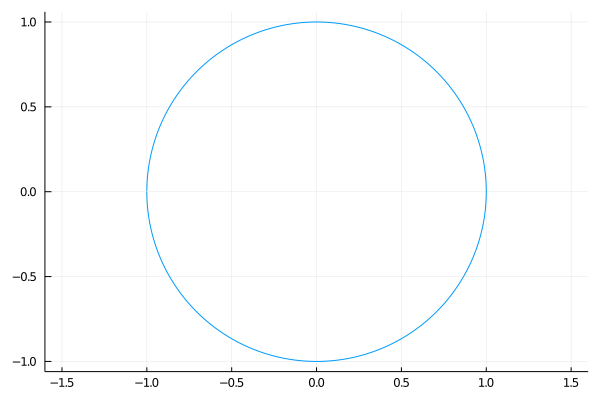

In [3]:
# Plot a circle
using LinearAlgebra
using Plots
th=[-pi:0.01:pi;]
X=cos.(th)
Y=sin.(th)
plot(X, Y, legend=false, aspectratio=:equal)

#### Area of a  unit circle should be $\pi$. How close can we come?

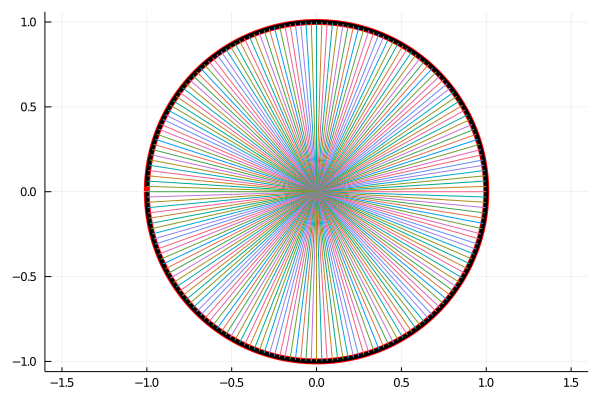

-0.000516745776955041

In [4]:
# Approximate the area of a unit circle via triangles
N = 200 # Number of triangles
ths = [-pi:(2*pi/N):pi;]
n = length(ths)
Xs = cos.(ths)
Ys = sin.(ths)
p1 = plot(X,Y,linewidth=6, color=:red)
p1 = plot!(Xs, Ys, legend=false, aspectratio=:equal,linewidth=4, color=:black)
for k = 1:n
    plot!([0;Xs[k]],[0;Ys[k]])
end
display(p1)
Area = 0.0
n = length(ths)
Xs = [Xs;Xs[1]]
Ys = [Ys;Ys[1]]
for k = 1:n
    u = [Xs[k];Ys[k];0.0]
    v = [Xs[k+1];Ys[k+1];0.0]
    AreaTriangle=0.5*norm(cross(u,v))
    global Area = Area+AreaTriangle
end
Area-pi

In [1]:
1==1

true

### Problem. Area of a Heart!

In [ ]:
# Plot a heart shape
using LinearAlgebra
using Plots
th=[-pi:0.01:pi;]
X=16*(sin.(th)).^3
Y=13.0*cos.(th)-5.0*cos.(2.0*th)-2.0*cos.(3.0*th)-1.0cos.(4.0*th)
plot(X, Y, legend = false)

In [ ]:
# Compute the actual area of the heart shape
Area=0.0
n=length(th)
X=[X;X[1]]
Y=[Y;Y[1]]
for k=1:n
    u=[X[k];Y[k];0.0]
    v=[X[k+1];Y[k+1];0.0]
    AreaTriangle=0.5*norm(cross(u,v))
    Area = Area+AreaTriangle
end
Area

In [ ]:
# Divide the heart shape into triangles
N=20 # Number of triangles
ths=[-pi:(2*pi/N):pi;]
n=length(ths)
Xs=16*(sin.(ths)).^3
Ys=13.0*cos.(ths)-5.0*cos.(2.0*ths)-2.0*cos.(3.0*ths)-1.0cos.(4.0*ths)
p1=plot(Xs, Ys, legend=false)
for k=1:n
    plot!([0;Xs[k]],[0;Ys[k]])
end
plot!(X,Y,linewidth=4, color=:red)
p1

In [ ]:
# Approximate the area of the heart shape via triangles
Area=0.0
n=length(ths)
Xs=[Xs;Xs[1]]
Ys=[Ys;Ys[1]]
# your code here
throw(ErrorException())
Area

In [ ]:
# Autograder cell
@assert abs(Area-565.4672003218795) < 19

In [ ]:
# Autograder cell

Reference: https://www.stumblingrobot.com/2016/05/09/give-vector-based-proof-herons-formula-computing-area-triangle/